In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, Activation, Dropout, Flatten
from keras.optimizers import Adam, Adadelta, SGD, Nadam
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate, Add

Using TensorFlow backend.


In [2]:
# Loading the data
from keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
# Unfortunately, this load_data() function only returns data split into train and test sets, the validation set is not present

In [3]:
# Finding the shapes of data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
# One X (input data) sample from train set containing 13 different features of a house in Boston
x_train[:1,:]

array([[   1.23247,    0.     ,    8.14   ,    0.     ,    0.538  ,
           6.142  ,   91.7    ,    3.9769 ,    4.     ,  307.     ,
          21.     ,  396.9    ,   18.72   ]])

In [5]:
# One Y (desired output) sample from train set containing one value of house pricing
y_train[:1]

array([ 15.2])

In [6]:
# Build the model architecture (the hypothesis)
# Aim is to build a model, that can predict Y based on input X.

inputs = Input(shape=(13,))

a = Dense(1024, kernel_initializer='glorot_uniform')(inputs)
a = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True)(a)
a = Activation('relu')(a)
a = Dropout(0.2)(a)

a = Dense(512, kernel_initializer='glorot_uniform')(a)
a = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True)(a)
a = Activation('relu')(a)
a = Dropout(0.2)(a)

outputs = Dense(1, activation='linear')(a)
model = Model(inputs, outputs)

In [7]:
# Set desired optimizer and loss function and compile
optimizer = Adam()
model.compile(loss='mean_absolute_error', optimizer=optimizer)

In [8]:
# Train the model
tvh = model.fit(x=x_train,
                y=y_train,
                batch_size=64,
                epochs=200,
                verbose=2,
                shuffle=True,
                initial_epoch=0,
                validation_data=(x_test, y_test))

Train on 404 samples, validate on 102 samples
Epoch 1/200
0s - loss: 22.0901 - val_loss: 11.0601
Epoch 2/200
0s - loss: 22.0021 - val_loss: 10.3832
Epoch 3/200
0s - loss: 21.9057 - val_loss: 11.3546
Epoch 4/200
0s - loss: 21.8145 - val_loss: 12.5342
Epoch 5/200
0s - loss: 21.7173 - val_loss: 13.6465
Epoch 6/200
0s - loss: 21.6348 - val_loss: 14.5547
Epoch 7/200
0s - loss: 21.5490 - val_loss: 15.3443
Epoch 8/200
0s - loss: 21.4585 - val_loss: 16.0137
Epoch 9/200
0s - loss: 21.3620 - val_loss: 16.6542
Epoch 10/200
0s - loss: 21.2804 - val_loss: 17.1820
Epoch 11/200
0s - loss: 21.1824 - val_loss: 17.6503
Epoch 12/200
0s - loss: 21.1044 - val_loss: 18.0931
Epoch 13/200
0s - loss: 21.0145 - val_loss: 18.5238
Epoch 14/200
0s - loss: 20.9197 - val_loss: 18.8938
Epoch 15/200
0s - loss: 20.8348 - val_loss: 19.2006
Epoch 16/200
0s - loss: 20.7487 - val_loss: 19.4954
Epoch 17/200
0s - loss: 20.6381 - val_loss: 19.8041
Epoch 18/200
0s - loss: 20.5656 - val_loss: 20.0771
Epoch 19/200
0s - loss: 20.

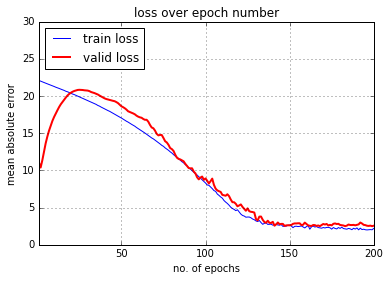

In [9]:
def plot_tvh(tvh, metric='loss', lossfunc='mean absolute error'):
    tvh = tvh.history

    # Plot metric over number of epochs
    val_metric = 'val_{}'.format(metric)
    train_Yaxis = tvh[metric]
    valid_Yaxis = tvh[val_metric]
    epoch_Xaxis = list(range(1, len(tvh[metric]) + 1))
    fig, ax = plt.subplots(1, 1)

    plt.plot(epoch_Xaxis, train_Yaxis, 'b-', label='train {}'.format(metric), linewidth=1.0)
    plt.plot(epoch_Xaxis, valid_Yaxis, 'r-', label='valid {}'.format(metric,), linewidth=2.0)
    plt.ylabel(lossfunc)
    plt.xlabel('no. of epochs')
    plt.legend(loc='upper left')
    plt.axis([1, len(tvh[metric]), 0, 30])
    plt.title('{0} over epoch number'.format(metric))
    plt.grid(True)
    plt.show()
    plt.close()

plot_tvh(tvh)

In [10]:
# Evaluate the model performance on test set
model.evaluate(x_test, y_test)

 32/102 [========>.....................] - ETA: 0s

2.5649168070624855

In [11]:
# Use the trained model to get predictions on new data
my_house = np.array([[1.5, 0., 8.2, 0., 0.55, 6.7, 95.3, 3.9, 4., 307., 21., 396.9 ,18.72]])
model.predict(my_house)

array([[ 19.68894386]], dtype=float32)

In [12]:
# Save the visualization of the model architecture
from keras.utils import plot_model
plot_model(model, to_file='output/model.png', show_shapes=True)